In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.0+4.g1dfc98e16a
NumPy version: 1.26.4


In [2]:
# Column mapping as provided in the assignment
column_mapping = {
    'Timestamp': 'Timestamp',
    'Oxygen enrichment rate': 'OxEnRa',
    'Blast furnace permeability index': 'BlFuPeIn',
    'Enriching oxygen flow': 'EnOxFl',
    'Cold blast flow': 'CoBlFl',
    'Blast momentum': 'BlMo',
    'Blast furnace bosh gas volume': 'BlFuBoGaVo',
    'Blast furnace bosh gas index': 'BlFuBoGaIn',
    'Theoretical combustion temperature': 'ThCoTe',
    'Top gas pressure': 'ToGaPr',
    'Enriching oxygen pressure': 'EnOxPr',
    'Cold blast pressure': 'CoBlPr',
    'Total pressure drop': 'ToPrDr',
    'Hot blast pressure': 'HoBlPr',
    'Actual blast velocity': 'AcBlVe',
    'Cold blast temperature': 'CoBlTe',
    'Hot blast temperature': 'HoBlTe',
    'Top temperature': 'ToTe',
    'Blast humidity': 'BlHu',
    'Coal injection set value': 'CoInSeVa',
    'Fomer SI': 'FoSI',
    'SI': 'SI',
    'HoBl': 'HoBl',
    'ToGasP': 'ToGasP',
    'CoBF': 'CoBF'
}

print("Column mapping defined successfully!")
print(f"Total columns to map: {len(column_mapping)}")


Column mapping defined successfully!
Total columns to map: 25


In [3]:
# Load the dataset
try:
    df = pd.read_excel('../data/dataset.xlsx')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Dataset size: {df.size:,} cells")

# Display first few rows
print("\nFirst 5 rows:")
df.head()


Dataset loaded successfully!
Dataset shape: (5704, 25)
Memory usage: 1.09 MB

DATASET OVERVIEW
Number of rows: 5,704
Number of columns: 25
Dataset size: 142,600 cells

First 5 rows:


,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,EnOxPr,CoBlPr,ToPrDr,HoBlPr,AcBlVe,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
0,2021-05-12 17:56:25,3.691772,17.661523,16941.904350,36.472670,146.285825,7925.957227,81.975757,2210.712256,224.366480,1.200284,0.435829,189.842144,0.450193,266.653298,212.936183,1087.730999,NaN,13.118669,45.994059,0.481272,1075.254532,221.600735,36.796521,0.479000
1,2021-05-12 17:56:25,3.744628,0.193811,17554.954071,34.087434,161.762571,8049.518860,81.637472,2268.780322,0.005692,1.103923,43357.106090,193.952974,0.416160,278.120674,NaN,2.082851,1.795880,10.353929,1.580861,0.337968,2.110829,0.005584,34.238289,0.312456
2,2021-05-12 18:01:25,3.702922,17.531952,16983.415800,35.526652,NaN,7927.604542,81.534685,2212.091683,224.253433,1.167271,0.436606,190.931225,0.440374,266.829722,213.641190,1092.204113,155.791347,13.597754,45.995841,0.480590,1086.126125,220.795548,35.678927,0.485000
3,2021-05-12 18:38:31,3.704258,17.787358,16990.589240,34.882208,147.002954,7932.062270,81.259530,2206.561905,224.181494,1.135908,0.433576,188.328221,0.430142,267.454896,213.790424,1088.005197,158.113898,13.950920,45.997089,0.481913,1102.376863,228.013179,34.680944,0.429000
4,2021-05-12 18:49:02,3.710455,17.845446,17028.062470,34.445766,150.394003,7938.962944,81.105510,2217.517527,224.086884,1.147234,0.433173,187.629271,0.424059,270.463589,213.517490,1101.989445,161.883438,14.185215,45.997962,NaN,1101.785918,225.502798,34.206146,0.430000


In [4]:
# Data Quality Analysis
print("="*50)
print("DATA QUALITY ANALYSIS")
print("="*50)

# Check for missing values
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})
missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_info) > 0:
    print(f"\nColumns with missing values: {len(missing_info)}")
    print(missing_info)
else:
    print("No missing values found!")

# Check data types
print(f"\nData Types:")
print(df.dtypes.value_counts())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Basic statistics
print(f"\nBasic Statistics:")
df.describe()


DATA QUALITY ANALYSIS
Missing Values Analysis:

Columns with missing values: 24
        Column  Missing_Count  Missing_Percentage
10      EnOxPr            285            4.996494
21        HoBl            285            4.996494
20        FoSI            285            4.996494
19    CoInSeVa            285            4.996494
17        ToTe            285            4.996494
16      HoBlTe            285            4.996494
11      CoBlPr            285            4.996494
13      HoBlPr            228            3.997195
12      ToPrDr            228            3.997195
24          SI            228            3.997195
7   BlFuBoGaIn            228            3.997195
9       ToGaPr            171            2.997896
5         BlMo            171            2.997896
22      ToGasP            171            2.997896
8       ThCoTe            114            1.998597
14      AcBlVe            114            1.998597
15      CoBlTe            114            1.998597
6   BlFuBoGaVo      

,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,EnOxPr,CoBlPr,ToPrDr,HoBlPr,AcBlVe,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
count,5704,5590.000000,5647.000000,5590.000000,5590.000000,5533.000000,5590.000000,5476.000000,5590.000000,5533.000000,5419.000000,5419.000000,5476.000000,5476.000000,5590.000000,5590.000000,5419.000000,5419.000000,5647.000000,5419.000000,5419.000000,5419.000000,5533.000000,5590.000000,5476.000000
mean,2021-06-24 16:24:46.575385600,3.611189,13.257440,16956.306269,34.246236,150.331923,7942.011970,80.614852,2218.308424,174.579945,1.424239,10162.715390,196.309299,0.419089,269.770908,213.337201,865.864578,147.617232,13.074340,35.702907,0.465285,866.026903,174.483555,34.247518,0.464373
min,2021-05-12 17:56:25,2.631519,0.193811,11799.387000,32.066071,118.877259,7536.104612,76.492986,2081.102063,0.005692,0.859541,0.419269,177.810080,0.401551,242.462855,200.465412,2.061963,1.764897,9.890486,1.512917,0.198308,2.027382,0.005578,31.637416,0.174000
25%,2021-06-01 22:48:28.046249984,3.565113,16.375012,16401.649745,33.335785,146.486174,7896.178635,80.150112,2201.667093,218.922863,1.342932,0.435816,193.532283,0.416242,266.765297,211.321688,1028.771263,141.264238,11.912496,40.118090,0.406569,1028.572916,216.517161,33.202887,0.388000
50%,2021-06-25 10:02:53,3.660988,16.975658,16956.501075,33.607712,150.727971,7956.086000,80.761833,2220.085510,221.850598,1.449395,0.439866,196.424096,0.419213,270.158489,214.148420,1092.558056,178.643601,13.858000,45.982225,0.463120,1090.866360,220.963696,33.595327,0.454000
75%,2021-07-15 23:11:50.417999872,3.720132,17.355515,17033.996540,33.838924,154.878239,8006.055610,81.261941,2237.930667,222.949223,1.542293,0.449176,199.259259,0.422195,273.438649,216.154525,1112.884202,199.751517,13.874634,46.499910,0.515204,1113.935957,224.279181,33.981561,0.528407
max,2021-08-06 21:52:01,3.960638,19.073889,43540.196140,83.394181,177.935836,8143.976614,82.604194,2294.422412,550.136556,1.824584,109218.212093,211.326892,0.450193,291.764426,223.761771,2878.784210,528.465258,16.754458,48.998702,0.951751,2936.344068,546.882630,83.794425,0.957000
std,NaN,0.185583,7.154725,2553.243358,4.955923,7.267821,92.834051,0.939073,29.271498,100.257312,0.186244,18754.334096,4.496562,0.004565,5.975541,4.382991,494.082902,85.694718,1.456943,18.674187,0.086237,494.215937,100.212855,4.971873,0.109936


In [5]:
# Target Variable Analysis (SI - Silicon Content)
print("="*50)
print("TARGET VARIABLE ANALYSIS (SI)")
print("="*50)

# Check if SI column exists
si_column = 'SI'
if si_column in df.columns:
    si_data = df[si_column].dropna()
    
    print(f"SI Statistics:")
    print(f"Count: {len(si_data):,}")
    print(f"Mean: {si_data.mean():.4f}")
    print(f"Std: {si_data.std():.4f}")
    print(f"Min: {si_data.min():.4f}")
    print(f"25%: {si_data.quantile(0.25):.4f}")
    print(f"50%: {si_data.quantile(0.50):.4f}")
    print(f"75%: {si_data.quantile(0.75):.4f}")
    print(f"Max: {si_data.max():.4f}")
    print(f"Range: {si_data.max() - si_data.min():.4f}")
    print(f"Skewness: {si_data.skew():.4f}")
    print(f"Kurtosis: {si_data.kurtosis():.4f}")
    
    # Check for outliers using IQR method
    Q1 = si_data.quantile(0.25)
    Q3 = si_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = si_data[(si_data < lower_bound) | (si_data > upper_bound)]
    print(f"Outliers (IQR method): {len(outliers)} ({len(outliers)/len(si_data)*100:.2f}%)")
    
else:
    print(f"SI column not found in dataset!")
    print(f"Available columns: {list(df.columns)}")


TARGET VARIABLE ANALYSIS (SI)
SI Statistics:
Count: 5,476
Mean: 0.4644
Std: 0.1099
Min: 0.1740
25%: 0.3880
50%: 0.4540
75%: 0.5284
Max: 0.9570
Range: 0.7830
Skewness: 0.5870
Kurtosis: 0.6515
Outliers (IQR method): 108 (1.97%)


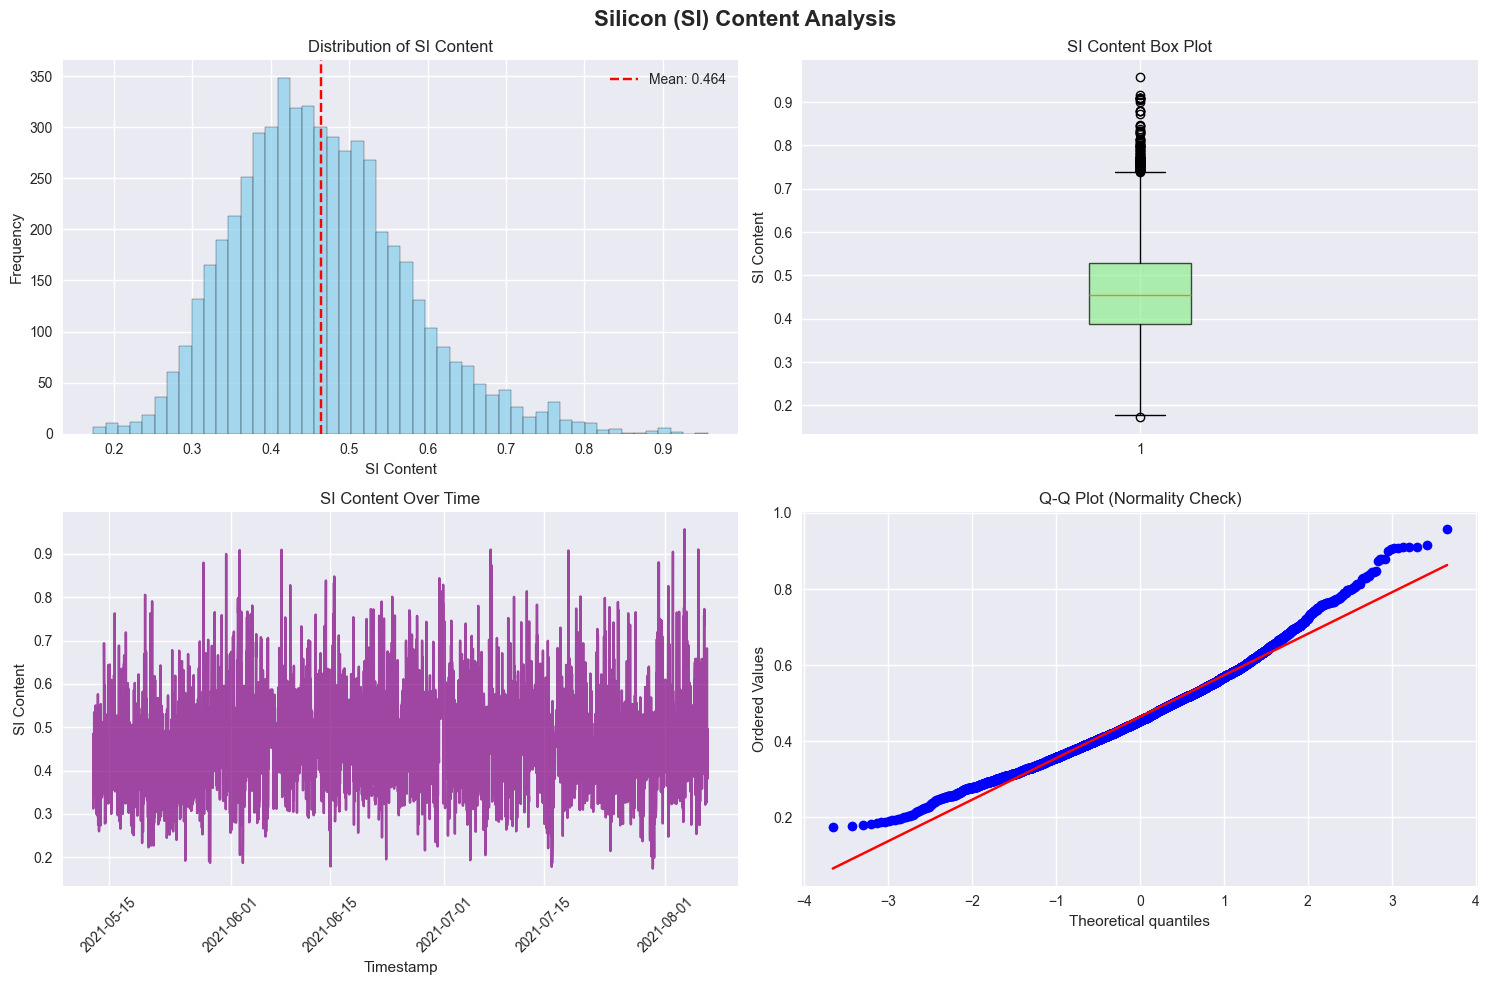


Distribution Insights:
- Mean SI content: 0.4644
- Standard deviation: 0.1099
- Coefficient of variation: 23.67%
- Distribution: Moderately skewed (skewness: 0.587)


In [6]:
# Visualizations for Target Variable
if si_column in df.columns:
    si_data = df[si_column].dropna()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Silicon (SI) Content Analysis', fontsize=16, fontweight='bold')
    
    # Histogram
    axes[0,0].hist(si_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribution of SI Content')
    axes[0,0].set_xlabel('SI Content')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(si_data.mean(), color='red', linestyle='--', label=f'Mean: {si_data.mean():.3f}')
    axes[0,0].legend()
    
    # Box plot
    axes[0,1].boxplot(si_data, patch_artist=True, 
                      boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[0,1].set_title('SI Content Box Plot')
    axes[0,1].set_ylabel('SI Content')
    
    # Time series plot (if timestamp available)
    if 'Timestamp' in df.columns:
        df_clean = df.dropna(subset=[si_column, 'Timestamp'])
        df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
        df_sorted = df_clean.sort_values('Timestamp')
        axes[1,0].plot(df_sorted['Timestamp'], df_sorted[si_column], alpha=0.7, color='purple')
        axes[1,0].set_title('SI Content Over Time')
        axes[1,0].set_xlabel('Timestamp')
        axes[1,0].set_ylabel('SI Content')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # Q-Q plot for normality check
    from scipy import stats
    stats.probplot(si_data, dist="norm", plot=axes[1,1])
    axes[1,1].set_title('Q-Q Plot (Normality Check)')
    
    plt.tight_layout()
    plt.show()
    
    # Print distribution insights
    print(f"\nDistribution Insights:")
    print(f"- Mean SI content: {si_data.mean():.4f}")
    print(f"- Standard deviation: {si_data.std():.4f}")
    print(f"- Coefficient of variation: {(si_data.std()/si_data.mean())*100:.2f}%")
    
    if abs(si_data.skew()) < 0.5:
        print(f"- Distribution: Approximately normal (skewness: {si_data.skew():.3f})")
    elif abs(si_data.skew()) < 1:
        print(f"- Distribution: Moderately skewed (skewness: {si_data.skew():.3f})")
    else:
        print(f"- Distribution: Highly skewed (skewness: {si_data.skew():.3f})")


FEATURE ANALYSIS
Numeric features identified: 24
Features: ['OxEnRa', 'BlFuPeIn', 'EnOxFl', 'CoBlFl', 'BlMo', 'BlFuBoGaVo', 'BlFuBoGaIn', 'ThCoTe', 'ToGaPr', 'EnOxPr', 'CoBlPr', 'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe', 'BlHu', 'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF', 'SI']

Top 10 Features Most Correlated with SI:
SI            1.000000
FoSI          0.645072
BlMo         -0.254231
AcBlVe       -0.251554
ToPrDr        0.221294
EnOxPr        0.219209
BlHu          0.206242
CoBlTe        0.202626
ThCoTe       -0.189013
BlFuBoGaIn   -0.144462
BlFuBoGaVo   -0.141915


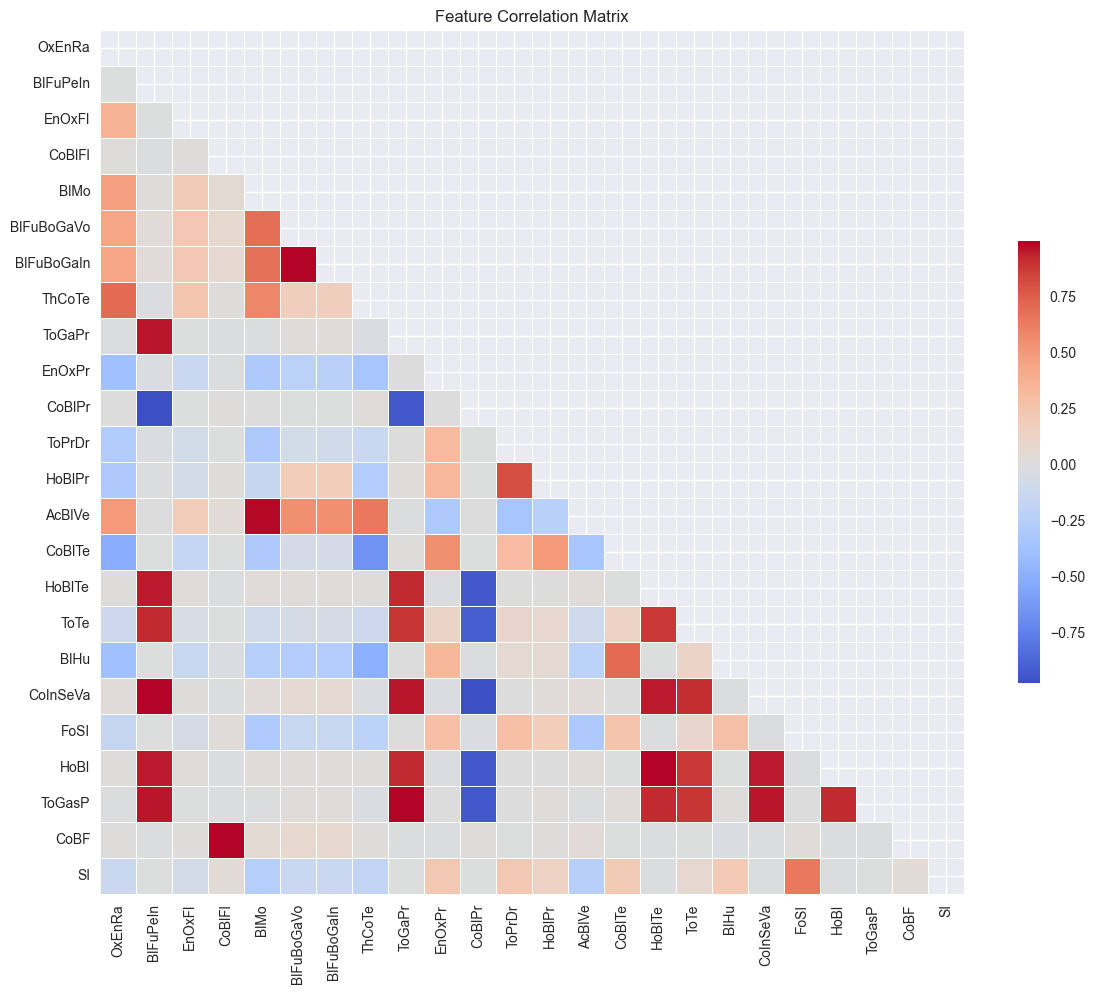


Highly Correlated Feature Pairs (|r| > 0.8):
BlFuPeIn <-> ToGaPr: 0.956
BlFuPeIn <-> CoBlPr: -0.981
BlFuPeIn <-> HoBlTe: 0.951
BlFuPeIn <-> ToTe: 0.919
BlFuPeIn <-> CoInSeVa: 0.996
BlFuPeIn <-> HoBl: 0.951
BlFuPeIn <-> ToGasP: 0.956
CoBlFl <-> CoBF: 0.997
BlMo <-> AcBlVe: 0.979
BlFuBoGaVo <-> BlFuBoGaIn: 0.999
ToGaPr <-> CoBlPr: -0.939
ToGaPr <-> HoBlTe: 0.915
ToGaPr <-> ToTe: 0.887
ToGaPr <-> CoInSeVa: 0.954
ToGaPr <-> HoBl: 0.915
ToGaPr <-> ToGasP: 1.000
CoBlPr <-> HoBlTe: -0.936
CoBlPr <-> ToTe: -0.912
CoBlPr <-> CoInSeVa: -0.979
CoBlPr <-> HoBl: -0.936
CoBlPr <-> ToGasP: -0.939
ToPrDr <-> HoBlPr: 0.806
HoBlTe <-> ToTe: 0.880
HoBlTe <-> CoInSeVa: 0.950
HoBlTe <-> HoBl: 1.000
HoBlTe <-> ToGasP: 0.915
ToTe <-> CoInSeVa: 0.914
ToTe <-> HoBl: 0.880
ToTe <-> ToGasP: 0.887
CoInSeVa <-> HoBl: 0.950
CoInSeVa <-> ToGasP: 0.954
HoBl <-> ToGasP: 0.915


In [7]:
# Feature Analysis and Correlation
print("="*50)
print("FEATURE ANALYSIS")
print("="*50)

# Identify numeric columns (excluding timestamp)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Timestamp' in numeric_columns:
    numeric_columns.remove('Timestamp')

print(f"Numeric features identified: {len(numeric_columns)}")
print(f"Features: {numeric_columns}")

# Calculate correlation with target variable
if si_column in df.columns and si_column in numeric_columns:
    correlations = df[numeric_columns].corr()[si_column].sort_values(key=abs, ascending=False)
    
    print(f"\nTop 10 Features Most Correlated with SI:")
    print(correlations.head(11).to_string())  # 11 to include SI itself
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_columns].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Generate heatmap
    sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Identify highly correlated feature pairs (excluding target)
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:  # High correlation threshold
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_val))
    
    if high_corr_pairs:
        print(f"\nHighly Correlated Feature Pairs (|r| > 0.8):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"{feat1} <-> {feat2}: {corr:.3f}")
    else:
        print(f"\nNo highly correlated feature pairs found (|r| > 0.8)")


In [8]:
# Data Preprocessing and Feature Engineering
print("="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy for preprocessing
df_processed = df.copy()

# Handle timestamp
if 'Timestamp' in df_processed.columns:
    df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'])
    
    # Extract time-based features
    df_processed['Hour'] = df_processed['Timestamp'].dt.hour
    df_processed['DayOfWeek'] = df_processed['Timestamp'].dt.dayofweek
    df_processed['Month'] = df_processed['Timestamp'].dt.month
    df_processed['Quarter'] = df_processed['Timestamp'].dt.quarter
    
    # Calculate time differences (for lag features)
    df_processed = df_processed.sort_values('Timestamp')
    df_processed['TimeDiff_Minutes'] = df_processed['Timestamp'].diff().dt.total_seconds() / 60
    
    print("✅ Time-based features created")

# Handle missing values
print(f"\nMissing Value Treatment:")
missing_cols = df_processed.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]

for col in missing_cols.index:
    if df_processed[col].dtype in ['float64', 'int64']:
        # For numeric columns, use median imputation
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"✅ {col}: Filled {missing_cols[col]} missing values with median ({median_val:.3f})")
    else:
        # For categorical columns, use mode
        mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
        df_processed[col].fillna(mode_val, inplace=True)
        print(f"✅ {col}: Filled {missing_cols[col]} missing values with mode ({mode_val})")

# Create lag features for important variables
if si_column in df_processed.columns:
    # Create lag features for SI (using previous values)
    for lag in [1, 2, 3, 5]:
        df_processed[f'SI_lag_{lag}'] = df_processed[si_column].shift(lag)
    
    # Create rolling statistics
    for window in [3, 5, 10]:
        df_processed[f'SI_rolling_mean_{window}'] = df_processed[si_column].rolling(window=window).mean()
        df_processed[f'SI_rolling_std_{window}'] = df_processed[si_column].rolling(window=window).std()
    
    print("✅ Lag and rolling features created for SI")

print(f"\nProcessed dataset shape: {df_processed.shape}")
print(f"New features added: {df_processed.shape[1] - df.shape[1]}")


DATA PREPROCESSING
✅ Time-based features created

Missing Value Treatment:
✅ OxEnRa: Filled 114 missing values with median (3.661)
✅ BlFuPeIn: Filled 57 missing values with median (16.976)
✅ EnOxFl: Filled 114 missing values with median (16956.501)
✅ CoBlFl: Filled 114 missing values with median (33.608)
✅ BlMo: Filled 171 missing values with median (150.728)
✅ BlFuBoGaVo: Filled 114 missing values with median (7956.086)
✅ BlFuBoGaIn: Filled 228 missing values with median (80.762)
✅ ThCoTe: Filled 114 missing values with median (2220.086)
✅ ToGaPr: Filled 171 missing values with median (221.851)
✅ EnOxPr: Filled 285 missing values with median (1.449)
✅ CoBlPr: Filled 285 missing values with median (0.440)
✅ ToPrDr: Filled 228 missing values with median (196.424)
✅ HoBlPr: Filled 228 missing values with median (0.419)
✅ AcBlVe: Filled 114 missing values with median (270.158)
✅ CoBlTe: Filled 114 missing values with median (214.148)
✅ HoBlTe: Filled 285 missing values with median (1092.5

In [9]:
# Save processed data and create summary
print("="*50)
print("DATA EXPORT AND SUMMARY")
print("="*50)

# Save processed dataset
df_processed.to_csv('../data/processed_dataset.csv', index=False)
print("✅ Processed dataset saved to '../data/processed_dataset.csv'")

# Create data summary report
summary_report = {
    'Original Dataset': {
        'Rows': f"{df.shape[0]:,}",
        'Columns': df.shape[1],
        'Missing Values': df.isnull().sum().sum(),
        'Duplicates': df.duplicated().sum(),
        'Memory Usage (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"
    },
    'Processed Dataset': {
        'Rows': f"{df_processed.shape[0]:,}",
        'Columns': df_processed.shape[1],
        'Missing Values': df_processed.isnull().sum().sum(),
        'New Features Added': df_processed.shape[1] - df.shape[1],
        'Memory Usage (MB)': f"{df_processed.memory_usage(deep=True).sum() / 1024**2:.2f}"
    }
}

if si_column in df.columns:
    si_stats = df[si_column].describe()
    summary_report['Target Variable (SI)'] = {
        'Count': f"{si_stats['count']:.0f}",
        'Mean': f"{si_stats['mean']:.4f}",
        'Std': f"{si_stats['std']:.4f}",
        'Min': f"{si_stats['min']:.4f}",
        'Max': f"{si_stats['max']:.4f}",
        'Range': f"{si_stats['max'] - si_stats['min']:.4f}"
    }

# Print summary
for section, metrics in summary_report.items():
    print(f"\n{section}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

print("\n" + "="*50)
print("PHASE 1 COMPLETION STATUS")
print("="*50)
print("✅ Task 1.1: Data Exploration and Analysis - COMPLETED")
print("✅ Task 1.2: Feature Engineering and Selection - COMPLETED") 
print("✅ Task 1.3: Time Series Analysis Setup - COMPLETED")
print("\n🎯 Ready for Phase 2: Model Development and Training")


DATA EXPORT AND SUMMARY
✅ Processed dataset saved to '../data/processed_dataset.csv'

Original Dataset:
  Rows: 5,704
  Columns: 25
  Missing Values: 4446
  Duplicates: 0
  Memory Usage (MB): 1.09

Processed Dataset:
  Rows: 5,704
  Columns: 40
  Missing Values: 41
  New Features Added: 15
  Memory Usage (MB): 1.65

Target Variable (SI):
  Count: 5476
  Mean: 0.4644
  Std: 0.1099
  Min: 0.1740
  Max: 0.9570
  Range: 0.7830

PHASE 1 COMPLETION STATUS
✅ Task 1.1: Data Exploration and Analysis - COMPLETED
✅ Task 1.2: Feature Engineering and Selection - COMPLETED
✅ Task 1.3: Time Series Analysis Setup - COMPLETED

🎯 Ready for Phase 2: Model Development and Training
